In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# For timeseries RNN LSTM neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [4]:
pip install yfinance

### Data Set: APPL(Apple Stock: 01/01/2014-06/30/2019)

In [5]:
pwd

'/content'

### Load Dataset

In [7]:
df_ALL=pd.read_csv('AAPL_stock_data.csv')

In [8]:
df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296658,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916719,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008968,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887329,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994270,258529600


### Brief Exploratory Data Analysis (EDA)

In [9]:
df_ALL.shape

(1382, 7)

In [10]:
df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
# Statistics Sumary
df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,33.948871,34.247564,33.653907,33.959740,31.580313,1.670774e+08
std,9.725011,9.820676,9.635296,9.729731,9.841611,9.220445e+07
min,17.684999,17.911785,17.626785,17.849285,15.628378,4.590360e+07
25%,26.586874,26.826250,26.304375,26.501875,24.170416,1.045275e+08
50%,31.481250,31.712500,31.213750,31.458751,28.320562,1.423682e+08
75%,42.462499,42.804376,42.068750,42.324376,40.078863,2.034164e+08
max,57.695000,58.367500,57.445000,58.017502,55.421497,1.065523e+09


### Keep Only "Close" (for Closing Price) and Filter out all other attributes
notes: the research focuses only on the closing price

In [12]:
df = df_ALL.iloc[:,4:5]

In [13]:
df.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


<Axes: >

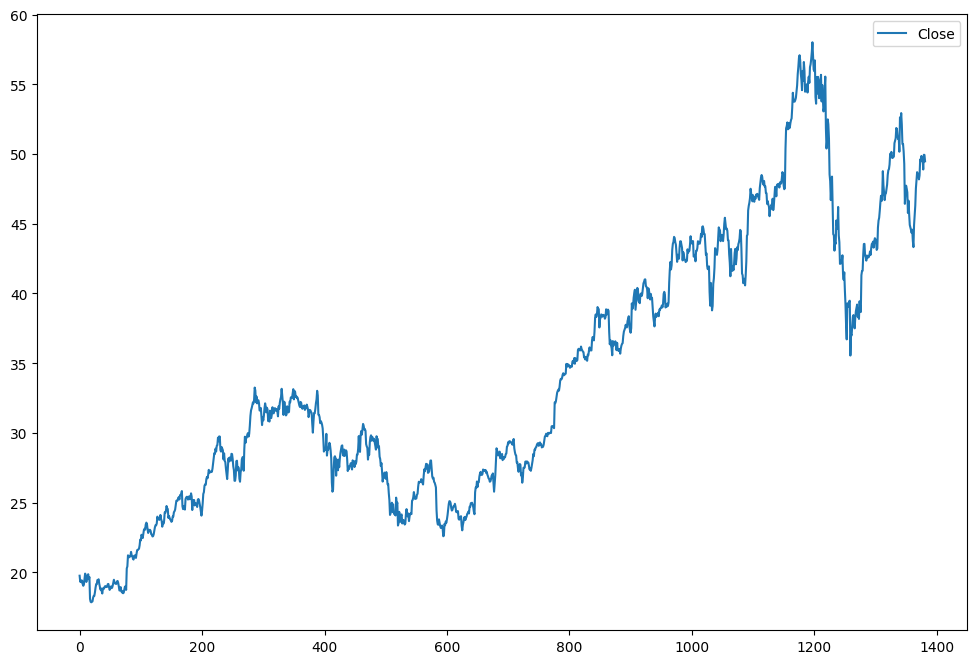

In [14]:
df.plot(figsize=(12, 8))

### Length of Input Time Series-Number of Input Time Steps

In [15]:
length60 = 60

In [16]:
length60

60

### Time Series Dataset: Train / test Split

In [17]:
len(df)

1382

In [18]:
test_precent = 0.1

In [19]:
len(df)*test_precent

138.20000000000002

### Split Data-->Train / test

In [20]:
test_length = np.round(len(df)*test_precent)
test_length

138.0

In [21]:
split_index = int(len(df) - test_length)
split_index

1244

In [22]:
data_train = df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [23]:
data_train.head(5)

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [24]:
data_train.tail()

,Close
1239,46.205002
1240,44.172501
1241,43.680000
1242,42.122501
1243,42.400002


In [25]:
data_test.head(5)

,Close
1184,55.959999
1185,54.470001
1186,54.560001
1187,54.592499
1188,55.007500


In [26]:
data_test.tail()

,Close
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001
1381,49.480000


### Normalize Data (Scale it into the range[0, 1])

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(data_train)

MinMaxScaler()

In [29]:
normalized_train = scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [30]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [31]:
len(normalized_train)

1244

In [32]:
len(train_tsGenerator60)

37

In [33]:
x,y = train_tsGenerator60[0]

In [34]:
# print(x)

In [35]:
# print(y)

### Bulid, Train, and Test Model

#### Bulid LSTM Model

In [36]:
n_features = 1

In [75]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

### Compile Model

In [38]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 

Train (Fit) Model Using fit_generator()

In [39]:
model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100
37/37 [==============================] - 15s 248ms/step - loss: 0.0785
Epoch 2/100
37/37 [==============================] - 9s 241ms/step - loss: 0.0138
Epoch 3/100
37/37 [==============================] - 8s 212ms/step - loss: 0.0058
Epoch 4/100
37/37 [==============================] - 8s 207ms/step - loss: 0.0115
Epoch 5/100
37/37 [==============================] - 8s 228ms/step - loss: 0.0177
Epoch 6/100
37/37 [==============================] - 9s 241ms/step - loss: 0.0043
Epoch 7/100
37/37 [==============================] - 9s 241ms/step - loss: 0.0031
Epoch 8/100
37/37 [==============================] - 8s 211ms/step - loss: 0.0041
Epoch 9/100
37/37 [==============================] - 9s 241ms/step - loss: 0.0035
Epoch 10/100
37/37 [==============================] - 9s 239ms/step - loss: 0.0030
Epoch 11/100
37/37 [==============================] - 8s 221ms/step - loss: 0.0050
Epoch 12/100
37/37 [==============================] - 8s 211ms/step - loss: 0.0026
Epoch 13/100

### Visualize Model's Performance after Training

In [40]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<Axes: >

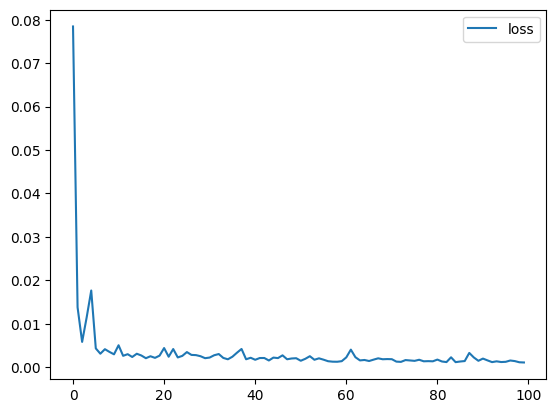

In [41]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

### Prediciton for Testing: Using TimeseriesGenerator
#### Create TimeseriesGenerator for Tesing

In [42]:
batch_size1 = 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

### Predicting the  Future Data Points for Testing

In [43]:
normalized_prediction = model.predict_generator (test_tsGenerator60)

In [44]:
normalized_prediction

array([[0.6473534 ],
       [0.6416957 ],
       [0.63537383],
       [0.62944865],
       [0.62317157],
       [0.616398  ],
       [0.6098868 ],
       [0.60292506],
       [0.59486705],
       [0.58480525],
       [0.57251185],
       [0.560899  ],
       [0.55085045],
       [0.5427732 ],
       [0.5370024 ],
       [0.53343606],
       [0.5284229 ],
       [0.5226044 ],
       [0.51631653],
       [0.5105898 ],
       [0.5063295 ],
       [0.503779  ],
       [0.502454  ],
       [0.50151837],
       [0.5012533 ],
       [0.5019462 ],
       [0.5036439 ],
       [0.5062825 ],
       [0.5088004 ],
       [0.5109294 ],
       [0.5122956 ],
       [0.5139327 ],
       [0.5157198 ],
       [0.517225  ],
       [0.520522  ],
       [0.52599114],
       [0.53317285],
       [0.5423341 ],
       [0.55339736],
       [0.5655196 ],
       [0.5769699 ],
       [0.5867886 ],
       [0.5943871 ],
       [0.60009736],
       [0.6040417 ],
       [0.6066735 ],
       [0.6082535 ],
       [0.609

In [45]:
len(normalized_prediction)

138

In [46]:
# convert normalized predictions back to the true values
prediction = scaler.inverse_transform(normalized_prediction)

In [47]:
prediction_index = np.arange(1244, 1382, step=1)

df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [48]:
df_prediction

,Prediction
1244,43.852314
1245,43.625057
1246,43.371117
1247,43.133114
1248,42.880974
...,...
1377,48.077301
1378,48.289932
1379,48.428082
1380,48.538830


### Visualize Prediction

<Axes: >

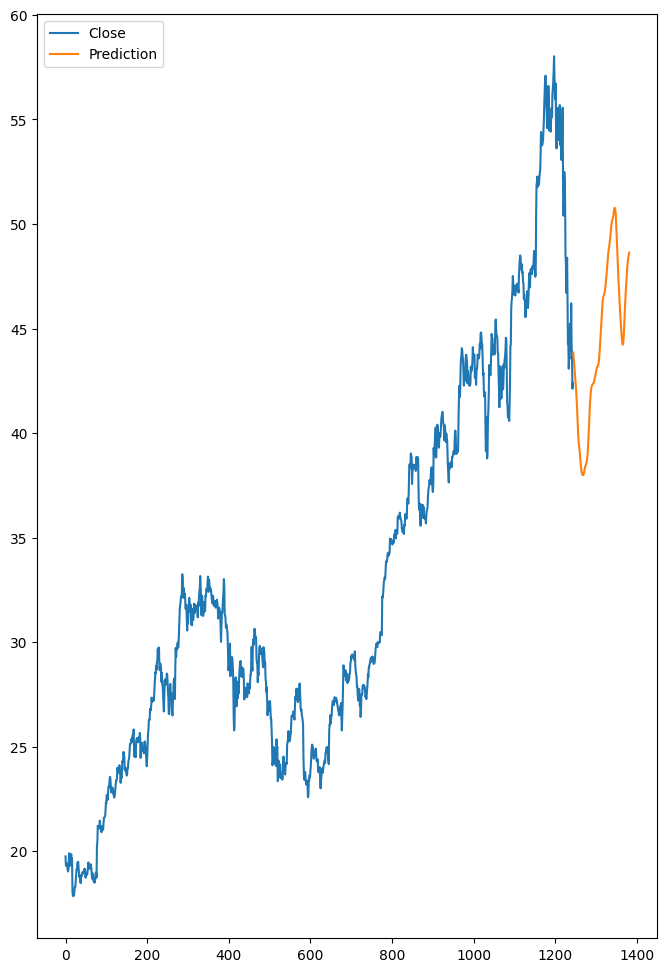

In [49]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

### Visualize Prediction and compare actual close price

<Axes: >

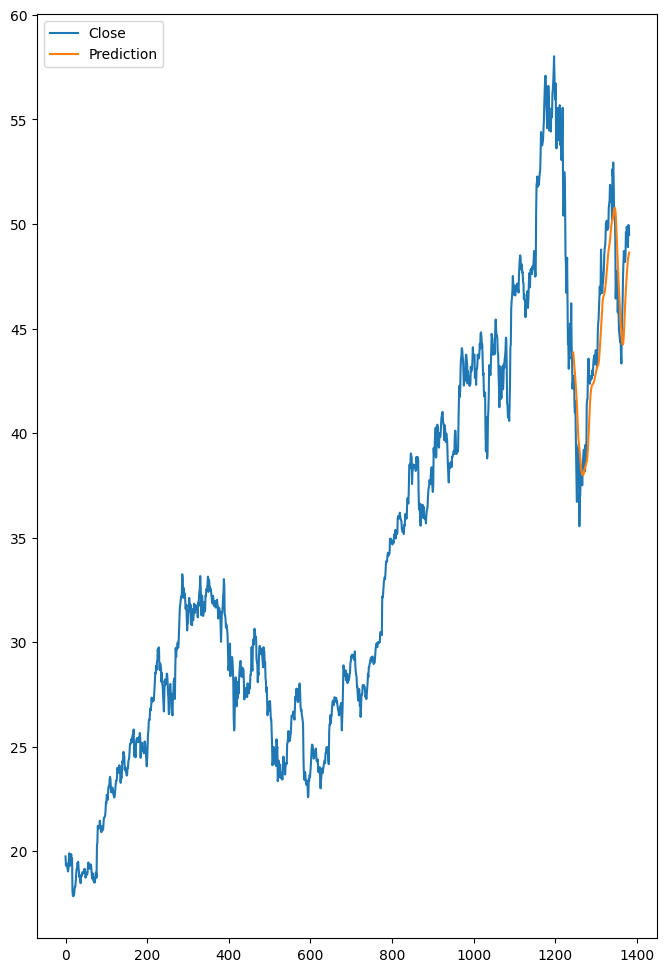

In [50]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

# Time Series Forecasting with LSTM

# PreProcess Full Input Dataset

In [51]:
#Still use Minmax Scaler to normalize the full input dataset

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

# Create TimeSeriesGenerator for Forecasting

In [52]:
# Number of time steps of the input time series

length60

60

In [53]:
# create timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length60, batch_size=batch_size32)


# Build, Compile, and Fit LSTM model for Forecasting

In [54]:
# Train/Fit LSTM model
# In forecasting, we don't valiate, only FORECAST
# So, not need EarlyStop: Not need validation_generator

model.fit_generator(forecast_tsGenerator, epochs = 100)

Epoch 1/100
42/42 [==============================] - 10s 247ms/step - loss: 0.0012
Epoch 2/100
42/42 [==============================] - 10s 237ms/step - loss: 0.0017
Epoch 3/100
42/42 [==============================] - 10s 242ms/step - loss: 0.0015
Epoch 4/100
42/42 [==============================] - 9s 210ms/step - loss: 0.0012
Epoch 5/100
42/42 [==============================] - 10s 237ms/step - loss: 0.0013
Epoch 6/100
42/42 [==============================] - 10s 243ms/step - loss: 0.0013
Epoch 7/100
42/42 [==============================] - 10s 243ms/step - loss: 0.0013
Epoch 8/100
42/42 [==============================] - 10s 242ms/step - loss: 0.0011
Epoch 9/100
42/42 [==============================] - 9s 217ms/step - loss: 0.0012
Epoch 10/100
42/42 [==============================] - 12s 276ms/step - loss: 0.0012
Epoch 11/100
42/42 [==============================] - 10s 240ms/step - loss: 0.0012
Epoch 12/100
42/42 [==============================] - 10s 243ms/step - loss: 0.0014
Epo

# Time Series Forecasting Using LSTM Neural Network: 07/01/2019 - 12/15/2019

In [55]:
forecast = []
# Set periods with the time span of forecasting
# Let's forecast for the next 107 business days (07/01/2019 - 12/15/2019)
periods = 117

first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)



1/1 [==============================] - 0s 77ms/step


# Inverse to Transform Normalized Data Back into True Values

In [56]:
forecast = full_scaler.inverse_transform(forecast)

forecast

array([[49.35263687],
       [49.29977266],
       [49.21357144],
       [49.11734087],
       [49.02304482],
       [48.93690824],
       [48.86137085],
       [48.79691386],
       [48.74301296],
       [48.69862187],
       [48.66243335],
       [48.63303242],
       [48.60902805],
       [48.58911778],
       [48.57213564],
       [48.55709759],
       [48.54320637],
       [48.52983709],
       [48.51655639],
       [48.50306979],
       [48.48921209],
       [48.47492104],
       [48.46021818],
       [48.44516338],
       [48.42987394],
       [48.41445521],
       [48.39904606],
       [48.38375662],
       [48.36869223],
       [48.35394868],
       [48.33959298],
       [48.32567303],
       [48.31222713],
       [48.29927205],
       [48.28681017],
       [48.27483911],
       [48.26333492],
       [48.25229042],
       [48.2416697 ],
       [48.2314512 ],
       [48.22161338],
       [48.21212751],
       [48.20296965],
       [48.19412303],
       [48.18556373],
       [48

In [57]:
df

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001


# Creating new time stamp index with pandas : 07/01/2019 - 12/15/2019

In [58]:
#calculate forecast index

forecast_index = np.arange(1382,1499,step=1)

In [59]:
# Assuming forecast is your array of values and forecast_index is your array of indices
# Ensure that forecast_index is properly defined and not empty
if len(forecast_index) == 0:
    raise ValueError("forecast_index is empty.")

# Create the DataFrame
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [60]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

In [61]:
forecast_df

,Forecast
1382,49.352637
1383,49.299773
1384,49.213571
1385,49.117341
1386,49.023045
...,...
1494,47.948108
1495,47.947115
1496,47.946147
1497,47.945214


<Axes: >

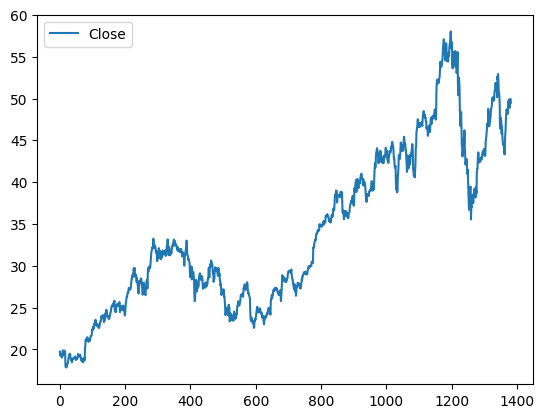

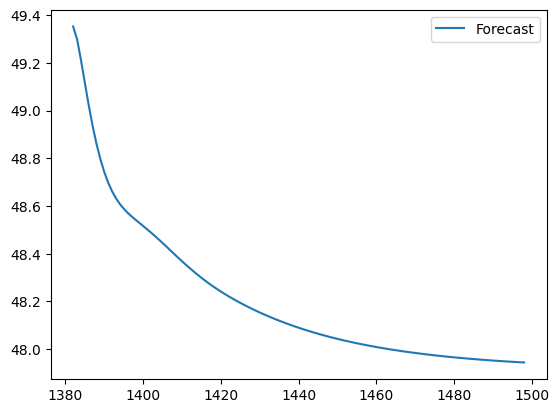

In [62]:
df.plot()
forecast_df.plot()

<Axes: >

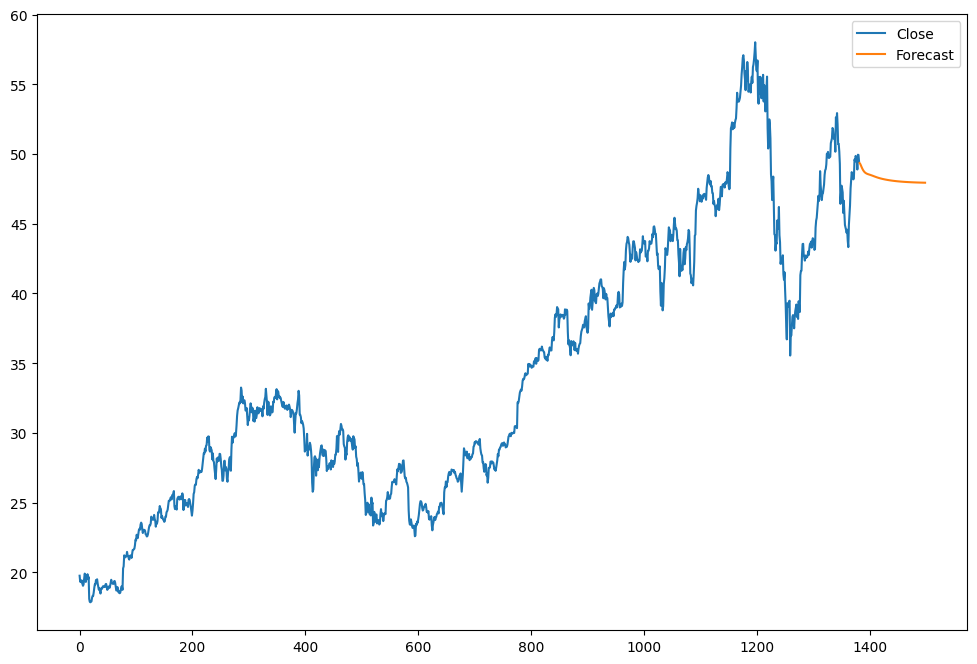

In [63]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [64]:
df_ALL_JUL_DEC_2019 = pd.read_csv('AAPL_stock_data.csv')

In [65]:
df_ALL_JUL_DEC_2019.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.296658,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.916719,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.008968,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.887329,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.994270,258529600


In [66]:
df_JUL_DEC_2019=df_ALL_JUL_DEC_2019.iloc[:,4:5]

In [67]:
df_JUL_DEC_2019

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001


<Axes: >

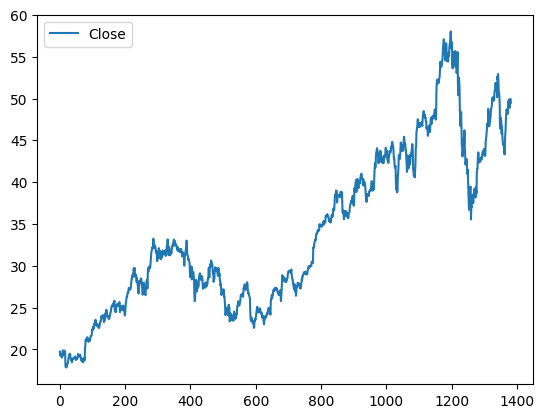

In [68]:
df_JUL_DEC_2019.plot()

In [69]:
forecast_df['Forecast'].values

array([49.35263687, 49.29977266, 49.21357144, 49.11734087, 49.02304482,
       48.93690824, 48.86137085, 48.79691386, 48.74301296, 48.69862187,
       48.66243335, 48.63303242, 48.60902805, 48.58911778, 48.57213564,
       48.55709759, 48.54320637, 48.52983709, 48.51655639, 48.50306979,
       48.48921209, 48.47492104, 48.46021818, 48.44516338, 48.42987394,
       48.41445521, 48.39904606, 48.38375662, 48.36869223, 48.35394868,
       48.33959298, 48.32567303, 48.31222713, 48.29927205, 48.28681017,
       48.27483911, 48.26333492, 48.25229042, 48.2416697 , 48.2314512 ,
       48.22161338, 48.21212751, 48.20296965, 48.19412303, 48.18556373,
       48.17728454, 48.16925435, 48.16147795, 48.15393858, 48.14662426,
       48.13953021, 48.13264924, 48.12597657, 48.11950262, 48.11322978,
       48.1071437 , 48.10124915, 48.09552937, 48.08999156, 48.08462374,
       48.07942351, 48.07438129, 48.0694995 , 48.06476853, 48.0601884 ,
       48.05574475, 48.05144474, 48.04727642, 48.04323738, 48.03

In [70]:
df_JUL_DEC_2019

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
1377,49.645000
1378,48.892502
1379,49.950001
1380,49.935001


<Axes: >

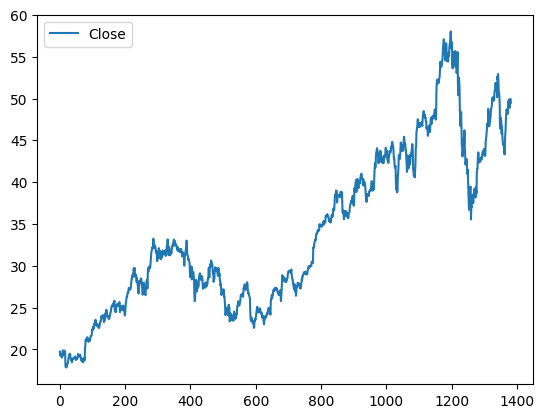

In [71]:
df_JUL_DEC_2019.plot()